In [23]:
import pandas as pd
customers = 'https://assets.datacamp.com/production/repositories/1646/datasets/c3a701a4729471ae0b92d8c300b470fd2ec0a73a/user_demographics_v1.csv'
dfc = pd.read_csv(customers)
dfc.head()

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [24]:
import pandas as pd
in_app_purchases = 'https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv'
dfp = pd.read_csv(in_app_purchases)
dfp.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [25]:
uid_combined_data = dfc.merge(dfp, on=['uid'], how='inner')

In [26]:
purchase_data = dfc.merge(dfp, on=['uid'], how='inner')

In [27]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197


In [28]:
from datetime import timedelta, datetime, timezone

In [29]:
current_date = datetime(2018, 3, 17, tzinfo=timezone.utc)
current_date

datetime.datetime(2018, 3, 17, 0, 0, tzinfo=datetime.timezone.utc)

In [30]:
max_lapse_date = current_date-timedelta(days=28)

In [31]:
purchase_data['reg_date'] = pd.to_datetime(purchase_data['reg_date'])
purchase_data['date'] = pd.to_datetime(purchase_data['date'])

In [32]:
purchase_data_filt = purchase_data[purchase_data['reg_date'] < max_lapse_date]

In [33]:
purchase_data_filt

,uid,reg_date,device,gender,country,age,date,sku,price
0,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-10-20,sku_three_499,499
1,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-05-29,sku_two_299,299
2,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-08-23,sku_four_599,599
3,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2018-03-26,sku_six_1299,299
4,16377492.0,2016-10-16 00:00:00+00:00,and,M,BRA,20,2018-03-17,sku_one_199,199
...,...,...,...,...,...,...,...,...,...
9001,91591874.0,2017-01-05 00:00:00+00:00,and,M,TUR,17,2017-09-26,sku_two_299,299
9002,91591874.0,2017-01-05 00:00:00+00:00,and,M,TUR,17,2017-12-01,sku_four_599,599
9003,41195147.0,2017-06-26 00:00:00+00:00,and,M,BRA,17,2017-07-10,sku_three_499,499
9004,41195147.0,2017-06-26 00:00:00+00:00,and,M,BRA,17,2017-07-15,sku_three_499,499


In [34]:
#purchase_data_filt.date = purchase_data_filt.date.dt.tz_localize('UTC')
#https://stackoverflow.com/questions/42826388/using-time-zone-in-pandas-to-datetime

In [35]:
purchase_data.date = purchase_data.date.dt.tz_localize('UTC')

In [36]:
purchase_data_filt = purchase_data[purchase_data.date <= purchase_data.reg_date + timedelta(days=28)]

In [37]:
purchase_data_filt

,uid,reg_date,device,gender,country,age,date,sku,price
1,92513925.0,2017-05-25 00:00:00+00:00,and,M,BRA,41,2017-05-29 00:00:00+00:00,sku_two_299,299
7,36350096.0,2017-04-07 00:00:00+00:00,and,M,USA,23,2017-04-21 00:00:00+00:00,sku_seven_1499,499
25,20819344.0,2017-11-09 00:00:00+00:00,and,M,BRA,33,2017-11-16 00:00:00+00:00,sku_four_599,599
60,53111877.0,2017-02-15 00:00:00+00:00,iOS,M,USA,16,2017-02-18 00:00:00+00:00,sku_two_299,299
66,30657860.0,2016-09-28 00:00:00+00:00,and,M,USA,22,2016-10-02 00:00:00+00:00,sku_three_499,499
...,...,...,...,...,...,...,...,...,...
8909,45588501.0,2016-11-27 00:00:00+00:00,and,F,USA,49,2016-12-08 00:00:00+00:00,sku_four_599,599
8967,88736154.0,2017-01-08 00:00:00+00:00,and,F,BRA,19,2017-01-12 00:00:00+00:00,sku_five_899,899
8982,22870987.0,2016-04-20 00:00:00+00:00,iOS,F,BRA,26,2016-05-12 00:00:00+00:00,sku_four_599,599
9003,41195147.0,2017-06-26 00:00:00+00:00,and,M,BRA,17,2017-07-10 00:00:00+00:00,sku_three_499,499


In [38]:
import numpy as np
# Set the max registration date to be one month before today
max_reg_date = current_date - timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

In [39]:
purchase_data['month1'] 

0         NaN
1       299.0
2         NaN
3         NaN
4         NaN
        ...  
9001      NaN
9002      NaN
9003    499.0
9004    499.0
9005      NaN
Name: month1, Length: 9006, dtype: float64

In [40]:
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


In [41]:
max_lapse_date = current_date = timedelta(days=7)

In [44]:
# # Group the data and aggregate first_week_purchases
# user_purchases = dfp.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})
# user_purchases.head()
# # Reset the indexes
# user_purchases.columns = user_purchases.columns.droplevel(level=1)
# user_purchases.head()
# user_purchases.reset_index(inplace=True)
# user_purchases.head()

# # Find the average number of purchases per day by first-week users
# user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
# user_purchases.head()
# user_purchases.columns = user_purchases.columns.droplevel(level=1)
# user_purchases.head()
# user_purchases.reset_index(inplace=True)
# user_purchases.head()
# # Plot the results
# user_purchases.plot(x='reg_date', y='first_week_purchases')
# plt.show()

In [45]:
import pandas as pd
pay_wall = 'https://assets.datacamp.com/production/repositories/1646/datasets/01054025eb094ac1086edf8d206b313b84d911c5/user_demographics_paywall.csv'
dfp2 = pd.read_csv(pay_wall)
dfp2.head()

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27
1,40143397,2016-07-02T00:00:00Z,and,F,DEU,56
2,89856430,2017-06-05T00:00:00Z,and,M,TUR,31
3,76188504,2016-09-24T00:00:00Z,iOS,M,BRA,54
4,76493748,2017-06-07T00:00:00Z,iOS,M,BRA,24


In [46]:
purchase_data = dfp.merge(dfp2, how='left', on = ['uid'])

In [47]:
purchase_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,NaN,NaN,NaN,NaN,NaN
1,2017-07-15,41195147,sku_three_499,499,NaN,NaN,NaN,NaN,NaN
2,2017-11-12,41195147,sku_four_599,599,NaN,NaN,NaN,NaN,NaN
3,2017-09-26,91591874,sku_two_299,299,NaN,NaN,NaN,NaN,NaN
4,2017-12-01,91591874,sku_four_599,599,NaN,NaN,NaN,NaN,NaN


In [49]:
# total_purchases = purchase_data.groupby(by=['uid'], as_index=False).purchase.sum()

In [50]:
import pandas as pd
pay_wall = 'https://assets.datacamp.com/production/repositories/1646/datasets/2751adce60684a03d8b4132adeadab8a0b95ee56/AB_testing_exercise.csv'
dfp3 = pd.read_csv(pay_wall)
dfp3.head()


,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [51]:
purchase_data = dfc.merge(dfp3, how='inner', on=['uid'])

In [53]:
# conversion_rate = (sum(purchase_data.purchase)/purchase_date.purchase.count())

In [61]:
import pandas as pd
user_purchases = pd.read_csv('user_purchases_chapter_two_exercise_one.csv')

In [ ]:
print(sub_date_demo.lapse_date.max())

In [ ]:
max_lapse_date = current_date - timedelta(days=7)

In [ ]:
conv_sub_data = sub_data_demo[
    sub_data_demo.lapse_date < max_lapse_date
]

In [ ]:
total_users_count = conv_sub_date.price.count()

In [ ]:
max_sub_date = conv_sub_data.lapse_date+timedelta(days=7)

In [ ]:
total_subs = conv_sub_data[(conv_sub_data.price) & conv_sub_data.subscription_date <= max_sub_date]

In [ ]:
total_subs_count()

In [ ]:
conversion_rate = total_subs_count/total_users_count

In [ ]:
conv_sub_data = conv_sub_data.copy()

In [ ]:
max_sub_date = conv_sub_data.lapse_date+timedelta(days=14)

In [ ]:
conv_sub_data = sub_data_demo[
    sub_data_demo.lapse_date < max_lapse_date
]

In [ ]:
subtime = np.where(
            conv_sub_data.subscription_date.notnull(),
            (conv_sub_data.subscription_date-conv_sub_data.lapse_date.dt.days,
            pd.NaT))

In [ ]:
conv_sub_data['sub_time'] = sub_time

In [ ]:
purchase_cohors = conv_sub_data.groupby(by=['gender','device'], as_index=False)
purchase_cohorts.agg({sub_time}:[gcr7,gcr14])

In [ ]:
def truncated_mean(data):
    top_val = data.quantile(0.9)
    bot_vl = data.quantile(0.1)
    trunc_data = data[(data<=top_val)&(data>=bot_val)]
    mean=trunc_data.mean()
    return mean

In [ ]:
def gcr7(data):
    current_date = datetime(2018, 3, 17, tzinfo=timezone.utc)
    max_lapse_date = current_date - timedelta(days=7)
    price = data.price
    sub_date = data.subscription_date
    conv_sub_data = sub_data_demo[sub_data_demo.lapse_date < max_lapse_date]
    total_subs = data[(price) & sub_date <= max_sub_date]
    mean=trunc_data.mean()
    return mean

In [ ]:
def gcr14(data):
    top_val = data.quantile(0.9)
    bot_vl = data.quantile(0.1)
    trunc_data = data[(data<=top_val)&(data>=bot_val)]
    mean=trunc_data.mean()
    return mean

In [ ]:
current_date = datetime(2018, 3, 17, tzinfo=timezone.utc)
current_date

In [ ]:
max_lapse_date = current_date - timedelta(days=7)
conv_sub_data = sub_data_demo[
    sub_data_demo.lapse_date < max_lapse_date
]

In [ ]:
conv_sub_data['sub_time'] = (conv_sub_date.subscription_date
                -conv_sub_data.lapse_date.dt.days)

In [ ]:
conversion_data = conv_sub_data.groupby(
    by=['lapse_date'],as_index=False
).agg({'sub_time': [ gc7]})

In [62]:
user_purchases.head()

,Unnamed: 0,date,uid,sku,price,reg_date,device,gender,country,age,first_week_purchases
0,0,2018-03-14,84715271.0,sku_two_299,299,2018-03-09,and,M,USA,34,1
1,1,2018-03-16,84715271.0,sku_two_299,299,2018-03-09,and,M,USA,34,1
2,7,2018-01-14,47315877.0,sku_three_499,499,2018-01-07,iOS,F,BRA,15,1
3,8,2018-01-15,47315877.0,sku_one_199,199,2018-01-07,iOS,F,BRA,15,0
4,9,2018-01-16,47315877.0,sku_two_299,299,2018-01-07,iOS,F,BRA,15,0


In [56]:
user_purchases = user_purchases.groupby(by=['reg_date',
                'uid']).agg({'first_week_purchases': ['sum']})
user_purchases.head()

first_week_purchases
                                       sum
reg_date   uid                            
2017-06-01 14425628.0                    1
           33027560.0                    0
           39880095.0                    2
           46080210.0                    1
           48166079.0                    0

In [57]:
# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)
user_purchases.head()

,reg_date,uid,first_week_purchases
0,2017-06-01,14425628.0,1
1,2017-06-01,33027560.0,0
2,2017-06-01,39880095.0,2
3,2017-06-01,46080210.0,1
4,2017-06-01,48166079.0,0


In [58]:
# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

In [59]:
user_purchases.head()

,reg_date,first_week_purchases
0,2017-06-01,0.846154
1,2017-06-02,1.333333
2,2017-06-03,1.352941
3,2017-06-04,1.727273
4,2017-06-05,1.666667


In [63]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})
user_purchases.head()
# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

In [64]:
# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)
user_purchases.head()


,reg_date,first_week_purchases
0,2017-06-01,0.846154
1,2017-06-02,1.333333
2,2017-06-03,1.352941
3,2017-06-04,1.727273
4,2017-06-05,1.666667


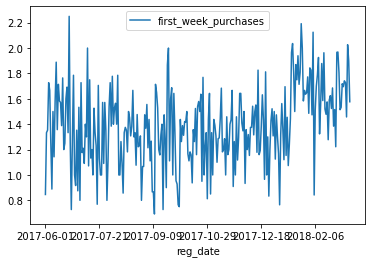

In [66]:
import matplotlib.pyplot as plt
# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

In [3]:
daily_revenue = pd.read_csv('daily_revenue.csv')

In [4]:
daily_revenue

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20T00:00:00Z,USA
1,2,male,ios,177217.0,2013-09-21T00:00:00Z,USA
2,3,male,ios,177197.0,2013-09-22T00:00:00Z,USA
3,4,male,ios,157193.0,2013-09-23T00:00:00Z,USA
4,5,male,ios,165592.0,2013-09-24T00:00:00Z,USA
...,...,...,...,...,...,...
47995,1196,female,android,14003.0,2016-12-28T00:00:00Z,TUR
47996,1197,female,android,16473.0,2016-12-29T00:00:00Z,TUR
47997,1198,female,android,14344.0,2016-12-30T00:00:00Z,TUR
47998,1199,female,android,14387.0,2016-12-31T00:00:00Z,TUR
